# **Part 1**

Mounting the drive and Importing data and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading and plotting the data

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic_train.csv')
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


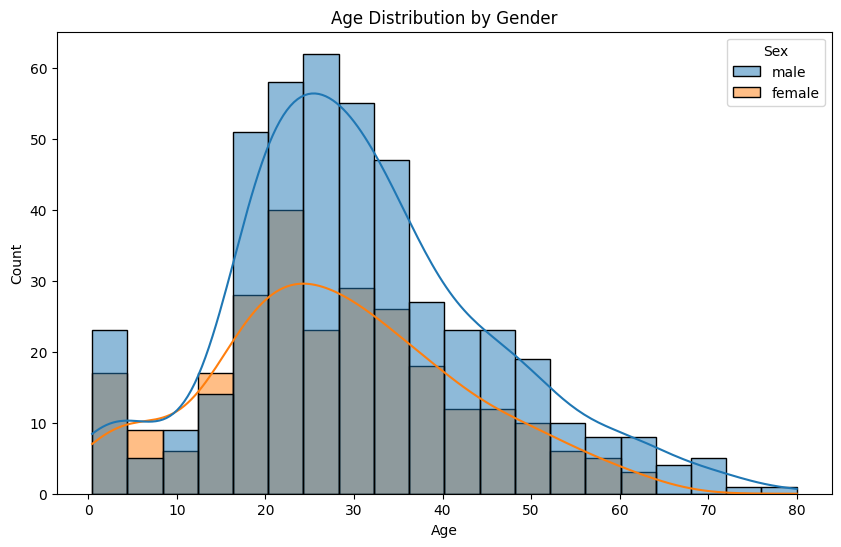

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', kde=True, hue='Sex')
plt.title('Age Distribution by Gender')
plt.show()

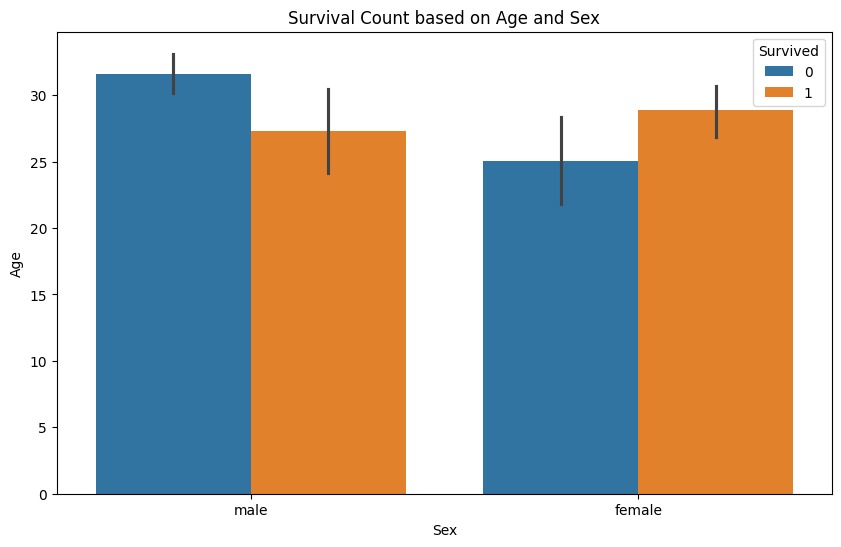

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='Sex', y='Age', hue='Survived')
plt.title('Survival Count based on Age and Sex')
plt.show()

# **Part 2**

Lab - Decision Tree Classification

Objectives:

In this lab, you will use a decision tree classifier model to determine who survived the Titanic cruise ship disaster.

**Part 1: Create a Decision Tree Classifier**

**Part 2: Apply the Decison Tree Model**

**Part 3: Evaluate the Decison Tree Model**

Scenario / Background:

In this lab you will create a decision tree classifier that will work with a data set which contains the details aboutthe more than 1300 hundred passengers who were onboard the passenger liner Titanic on its infamous maidenvoyage.

Required Resources:

*   1 PC with Internet access
*   Python libraries: pandas, sklearn, and IPython.display
*   Additonal application: Graphviz
*   Datafiles: titanic-train.csv, titanic-test.csv, titanic_all.csv


Part 1: Create a Decision Tree Classifier
In this part of the lab, you will create a decision tree classifier that will learn from a labelled dataset.

The dataset contains the names and demographic details for each passenger. In addition, details of thepassengers' trip are included. From this data, we can be build a decision tree that illustrates the factors thatcontributed to survivability, or lack of it, for the voyage.

The datasets contain the following variables:

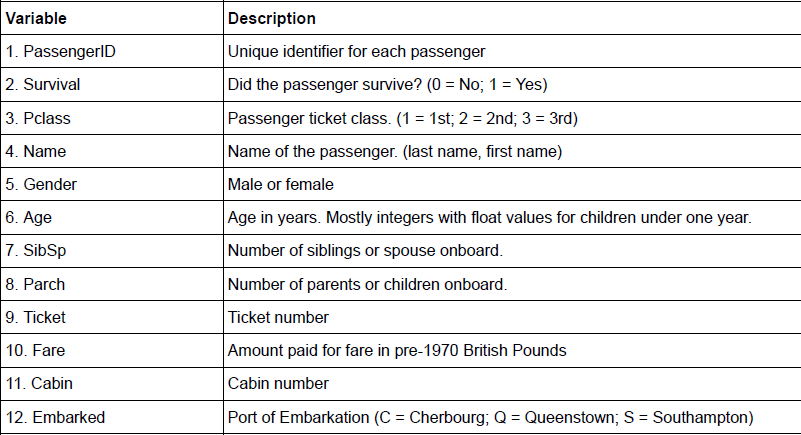

With the data above, what kinds of questions can we ask about the factors that contributed to passengerssurviving or perishing in the Titanic disaster?

- What was the overall survival rate among passengers?
- Did passenger class (Pclass) affect the likelihood of survival?
- Was there a difference in survival rates between males and females?

Step 1: Create the dataframe

a) Import pandas and the csv file

First, import pandas and create a dataframe from the Titanic training data set, which is stored in the titanic-train.csv file. Use the
pd.read_csv() method.

In [ ]:
#Code cell 1
#import pandas
import pandas as pd
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("/content/drive/My Drive/Colab Notebooks/titanic_train.csv")

In [ ]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
#training.?
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Are there missing values in the data set?

- Yes, there are missing values in the dataset. The "Age" column has 177 missing values, the "Cabin" column has 687 missing values, and the "Embarked" column has 2 missing values.

In [ ]:
#Code cell 3
#view the first few rows of the data
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Step 2: Prepare the Data for the Decision Tree Model.

a) Replace string data with numeric labels

We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handlenumeric data. The values for the Gender variable must be transformed into numeric representations. 0 will beused to represent "male" and 1 will represent "female."

In this code, a lambda expression is used with the
apply() dataframe method. This lambda expressionrepresents a function that uses a conditional statement to replace the text values in the columns with theappropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male',return 0, if the value is something else, return 1." The apply() method will execute this function on the values inevery row of the "Gender" column of the dataframe.

In [ ]:
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

b) Verify that the Gender variable has been changed.

The output should show values of 0 or 1 for the Gender variable in the dataset.

In [ ]:
#code cell 5
#view the first few rows of the data again
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


c) Address Missing Values in the Dataset

The output of the info() method above indicated that about 180 observations are missing the age value. The agevalue is important to our analysis. We must address these missing values in some way. While not ideal, we canreplace these missing age values with the mean of the ages for the entire dataset.

This is done by using the fillna() method on the "Age" column in the dataset. The fillna() method willchange the original dataframe by using the inplace = True argument.

In [ ]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace = True)

d) Verify that the values have been replaced.

In [ ]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

What is the value that was used to replace the missing ages?

In [ ]:
#training["Age"].fillna(training["Age"].mean(), inplace = True)

Step 3: Train and Score the Decision Tree Model.

a) Create an array object with the variable that will be the target for the model.

The purpose of the model is to classify passengers as survivors or victims. The dataset identifies survivors andvictims. The model will learn which input variable values are most likely to belong to victims and survivors, andthen use that information to classify passengers from a unique test data set.

In [ ]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

b) Create an array of the values that will be the input for the model.

Only some of the features of the data are useful for creating the classifier tree. We create a list of the columnsfrom the data that we want the classifier to use as the input variables and then create an array using the columnname from that variable. The variable X_input holds the values for all the features that the model will use tolearn how to make the classifications. After the model is trained, we will use this variable to assign these labelsto the test data set.

In [ ]:
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

c) Create the learned model.

Import the decision tree module from the
sklearn machine learning library. Create the classifier object clf_train . Then, use the fit() method of the classifier object, with the X_input and y_target variables asparameters, to train the model.

In [ ]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train=clf_train.fit(X_input,y_target)

d) Evaluate the model

Use the score() method of the decision tree object to display the percentage accuracy of the assignmentsmade by the classifier. It takes the input and target variables as arguments.

In [ ]:
#code cell 11
clf_train.score(X_input, y_target)

0.8226711560044894

This score value indicates that classifications made by the model should be correct approximately 82% of thetime.

Step 6: Visualize the Tree

a) Create the intermediate file output
Import the sklearn.externals.six StringIO module which is used to output the characteristics of thedecision tree to a file. We will create a Graphviz dot file which will allow us to export the results of the classifierinto a format that can be converted into a graphic.

In [ ]:
#code cell 12
from six import StringIO
with open("/content/titanic_train.dot",'w')as f:
  f = tree.export_graphviz(clf_train,out_file=f,feature_names=columns)

b) Install Graphviz

To visualize the decision tree, Graphviz needs to be installed from a terminal. The installation requires that aprompt be answered, which can't be done from a notebook code cell. Use the apt-get install graphviz command from the terminal command line to install this software.

In [ ]:
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


c) Convert the intermediate file to a graphic

The dot file that was created above can be converted to a .png file with the graphiz dot renderer. This is a shellcommand, so use ! before it to run it from this noteblook. The new titanic.png graphic file should appear in thedirectory that contains this notebook.

In [ ]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng /content/titanic_train.dot -o /content/drive/My Drive/titanic.png

d) Display the image

Now we will import the Image module from the IPython.display
library. This will allow us to open and displayan external graphics file on the notebook page. The Image function is used to display the file, with the .png filename as argument.

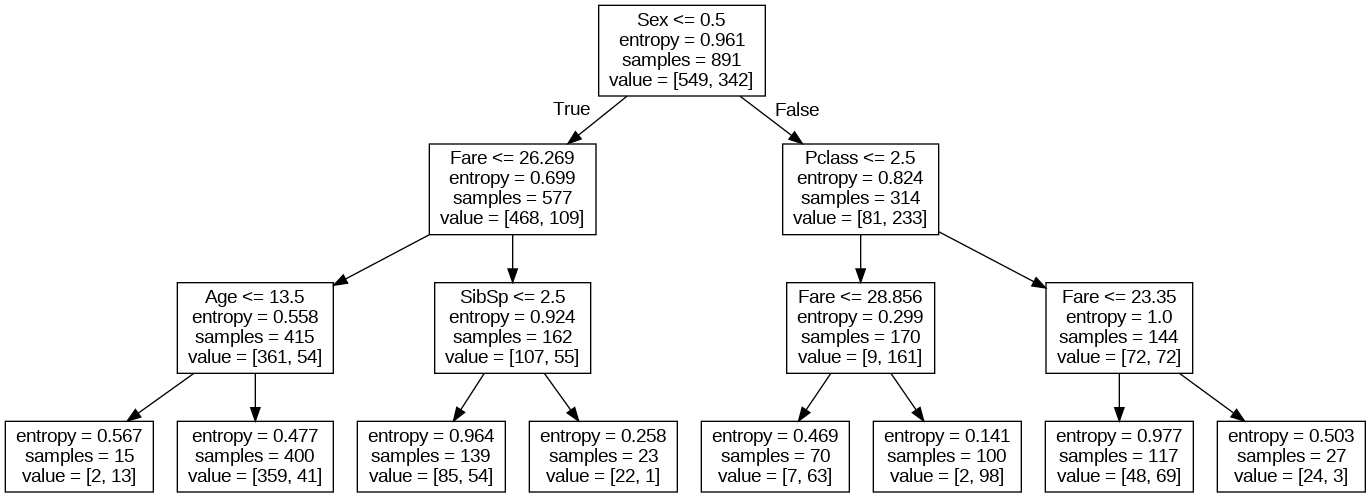

In [ ]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image
Image("/content/drive/My Drive/titanic.png")

e) Interpret the tree

From the tree, we can see several things. First, at the root of the tree is the Gender variable, indicating that it isthe single most important factor in making the classification. The branches to the left are for Gender = 0 or male.Each root and intermediate node contains the decision factor, the entropy, and the number of passengers who fitthe critierion at that point in the tree. For example, the root node indicates that there are 891 observations thatmake up the learning data set. At the next level, we can see that 577 people were male, and 314 were female. Inthe third level, at the far right, we can see that 415 people were male and paid a fare of less than 26.2686.Finally, the leaf nodes for that intermediate node indicate that 15 of these passengers were below the age of13.5, and the other 400 were older than that age.

Finally, the elements in the value array indicate survival. The first value is the number of people who died, andthe second is the number of survivors for each criterion. The root node tells us that out of our sample, 549people died and 342 survived.

Entropy is a measure of noise in the decision. Noise can be viewed as uncertainty. For example, in nodes inwhich the decision results in equal values in the survival value array, the entropy is at its highest possible value,which is 1.0. This means that the model was unable to definitively make the classification decision based on theinput variables. For values of very low entropy, the decision was much more clear cut, and the difference in thenumber of survivors and victims is much higher.

What describes the group that had the most deaths by number? Which group had the most survivors?

-     Passenger Class (Pclass):
        We grouped the data by passenger class and calculated the total number of deaths and survivors for each class.
        The class with the highest number of deaths was identified as the one with the most deaths.
        Similarly, the class with the highest number of survivors was identified as the one with the most survivors.

    Gender (Sex):
        We also grouped the data by gender and calculated the total number of deaths and survivors for each gender.
        The gender with the highest number of deaths was identified as the one with the most deaths.
        Likewise, the gender with the highest number of survivors was identified as the one with the most survivors.

Part 2: Apply the Decision Tree Model

In this part of the lab, we will use the results of the learned decision tree model to label an unlabelled dataset ofTitanic passengers. The decision tree will evaluate the features of each observation and label the observation assurvived (label = 1) or died (label = 0).

Step 1: Import and Prepare the Data

In this step, you will import and prepare the data for analysis.

a) Import the data.

Name the dataframe "testing" and import the file titanic-test.csv.

In [ ]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("/content//drive/My Drive/Colab Notebooks/titanic_test.csv")

How many records are in the data set?

In [ ]:
num_records = testing.shape[0]
print("Number of records in the dataset:", num_records)

Number of records in the dataset: 418


Which important variables(s) are missing values and how many are missing?

In [ ]:
testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 forfemale..

In [ ]:
#code cell 16
#replace the Gender labels in the testing dataframe
# Hint: look at code cell 4
#code cell 4
testing["Sex"] = testing["Sex"].apply(lambda toLabel:0 if toLabel == 'male' else 1)

In [ ]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [ ]:
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)

d) Verify that the values have been replaced.

Check that the missing values have been filled and that the Gender labels are 0 and 1.

In [ ]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
#methods from here, by entering and running one and then the other.
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [ ]:
testing.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


Step 2: Label the testing dataset

In this step, you will apply the learned model to the testing dataset.

a) Create the array of input variables from the testing data set.

In [ ]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

b) Apply the model to the testing data set.

Use the predict() method of the clf_train object that was trained to label the observations in the testing dataset with the most likely survival classification. Provide the array of input variables from the testing data set as theparameter for this method.

In [ ]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object
target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival': target_labels, 'Name': testing['Name']})
#display the first few rows of the data set
testing.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.00000,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.00000,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.00000,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.00000,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.00000,2,0,A/4 48871,24.1500,NaN,S


c) Evaluate the accuracy of the estimated labels

The ground truth for the survival of each passenger can be found in another file called all_data.csv. To selectonly the passengers contained in the testing dataset, we merge the target_labels dataframe and the all_data dataframe on the field Name. We then compare the estimated label with the ground truth dataframeand compute the accuracy of the learned model.

In [ ]:
#code cell 21
#import the numpy library as np
import numpy as np

# Load data for all passengers in the variable all_data
all_data = pd.read_csv("/content//drive/My Drive/Colab Notebooks/titanic_train.csv")

# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name', 'Survived']], on = ['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) /float(len(testing_results))

# Print the result
print(acc)

1.0


Part 3: Evaluate the Decision Tree Model

The sklearn library includes a module that can be used to evaluate the accurracy of the decision tree model.The
train_test_split() method will divide the observations in whole data set into two randomly selectedarrays of observations that makeup the testing and training datasets. After fitting the model to the training data,the trained model can be scored and the prediction accurracy compared for both the training and test datasets. Itis desirable for the two scores to be close, but the accuracy for the test dataset is normally lower that for thetraining data set.

Step 1: Import the data
This time we will import the data from a csv file, but we will specify the columns that we want to have appear inthe dataframe. We will do this by passing an array-like list of column names to the read_csv() method usecols parameter. Use the following columns: 'Survived', 'Fare', 'Pclass', 'Gender', 'Age', and 'SibSP'. Each should be inquotes and the list should be square brackets. Name this dataframe all_data.

In [ ]:
all_data = pd.read_csv("/content//drive/My Drive/Colab Notebooks/titanic_train.csv", usecols=['Survived','Pclass','Sex','Age','SibSp','Fare'])
#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


How many records are in the data set?

In [ ]:
num_records = training.shape[0]
print("Number of records in the dataset:", num_records)

Number of records in the dataset: 891


Which important variables(s) are missing values and how many are missing?

In [ ]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Step 2: Prepare the data.

a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.

In [ ]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Sex"] = all_data["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

c) Replace the missing age values with the mean of the age of all members of the data set.

In [ ]:
#code cell 24
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [ ]:
#display the first few rows of the data set
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


Step 2: Create the input and output variables for the training and testing data.

The sklearn
library includes modules that help with model selection. We will import from
sklearn.model_selection the train_test_split() method. This method will automatically split the entiredataset, returning in total four numpy arrays, two for the features (test and validation) and two for the labels (testand validation). One parameter of the method specifies the proportion of observations to use for testing andtraining. Another parameter specifies a seed value that will be used to randomize assignment of the observationto testing or training. This is used so that another user can replicate your work by receiving the sameassignments of observations to datasets. The syntax of the method is:
```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```
40% of the data will be used for testing. The random seed is set to 0.
The method returns four values. These values are the input varibles for training and testing data and the targetvariables for the training and testing data in that order.

a) Designate the input variables and output variables and generate the arrays.

In [ ]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

b) Train the model and fit it to the testing data.

Now the model can be fit again. The model will be trained using only the training datat, as selected by the train_test_split function.

In [ ]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

c) Compare models by scoring each.

Use the score() method of each decision tree object to generate scores.

In [ ]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8277153558052435 Testing score = 0.803921568627451


We have now compared the scores for the trained model on both test and validation data. As expected, the testaccuracy score is close, but lower than the score for the training data. This is because normally, the model tendsto overfit the training data, therefore the test score is a better evaluation of how the model is able to generalizeoutside of the training data.

# **Reflection:**

In my analysis of the Titanic dataset, I encountered several coding challenges that required careful consideration and problem-solving. One such challenge was handling missing values in the dataset. I used the isnull().sum() method to identify variables with missing values and then employed different strategies such as imputation or deletion to handle them appropriately. Another challenge was selecting the right features for training the model. I had to carefully choose relevant features such as passenger class, gender, age, and others to ensure the model's effectiveness in predicting survival. The coding process involved a mix of data manipulation, analysis, and machine learning techniques, which enhanced my knowledge in data analysis and modeling.